In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [112]:
def curve(x, m, a, k, c): return m*np.log(a+k*x) + c
def straight_line(x, m, c): return m*x + c

In [121]:
def plotting_function(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='bo', round_to=3):
    text = "If the Equation is $y = m\log(a+x)+c$\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {round((pcov[0][0])**0.5, round_to)}\n"
    text += f"    a = {format(popt[1], '.4g')} ± {round((pcov[1][1])**0.5, round_to)}\n"
    text += f"    c = {format(popt[2], '.4g')} ± {round((pcov[2][2])**0.5, round_to)}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
#     plt.plot(xFit, curve(xFit, popt[0], popt[1], popt[2], popt[3]), ':k')
    
    plt.legend(["Data Points", "", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     plt.ylim(bottom=0)

#     plt.text(0.45, 0.19, text, fontsize=11, transform=plt.gcf().transFigure)

In [89]:
def plotting_function_linear(xs, ys, popt, pcov, xlabel='', ylabel='', plot_shape='bo', round_to=3):
    text = "If the Equation is $y = mx + c$\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {round((pcov[0][0])**0.5, round_to+2)}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {round((pcov[1][1])**0.5, round_to+2)}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), ':k')

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

#     plt.text(0.52, 0.15, text, fontsize=11, transform=plt.gcf().transFigure)

In [3]:
v_breakdown = 5.6
rs = 0.5584

# load regulation

In [4]:
rl = np.array([0.983, 0.996, 1.467, 2.179, 3.86, 9.84, 999])
inp_v = np.array([12, 12, 11.61, 11.66, 11.68, 11.62, 11.6])
out_v = np.array([5.869, 5.858, 5.890, 5.908, 5.929, 5.937, 5.938])
out_i = np.array([5.83, 5.92, 4.03, 2.72, 1.54, 0.60, 0])

v_th = (rl*inp_v)/(rs+rl)

v_th, out_v*out_i, out_i*rl

(array([ 7.65278318,  7.6891405 ,  8.40913894,  9.28148608, 10.20387471,
        10.99599938, 11.5935197 ]),
 array([34.21627, 34.67936, 23.7367 , 16.06976,  9.13066,  3.5622 ,
         0.     ]),
 array([5.73089, 5.89632, 5.91201, 5.92688, 5.9444 , 5.904  , 0.     ]))

### V_L vs R_L

If the Equation is $y = m\log(a+x)+c$
For the best fit curve:
    m = 0.01782 ± 0.006
    a = -10.21 ± 1107448446151892.5
    c = 11.67 ± 1265295305862445.0

The curve looks like:


C:\Users\user\AppData\Local\Temp\ipykernel_12088\2359131207.py:1: RuntimeWarning: invalid value encountered in log
  def curve(x, m, a, k, c): return m*np.log(a+k*x) + c


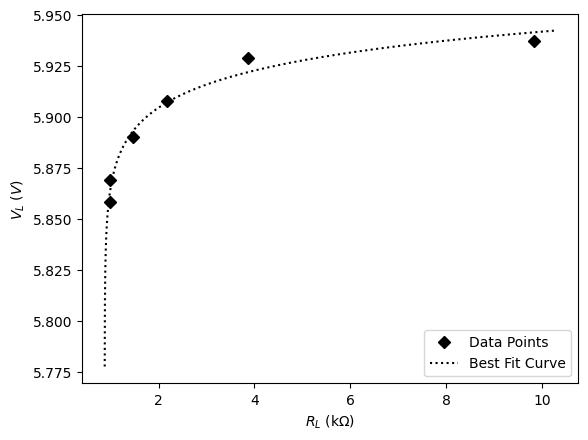

In [120]:
popt0, pcov0 = curve_fit(curve, rl[:-1], out_v[:-1])
plotting_function(rl[:-1], out_v[:-1], popt0, pcov0, '$R_L$ (k$\Omega$)', '$V_L$ ($V$)', plot_shape='Dk')

### V_L vs I_L

If the Equation is $y = mx + c$
For the best fit curve:
    m = -0.0135 ± 0.00084
    c = 5.944 ± 0.0031

The curve looks like:


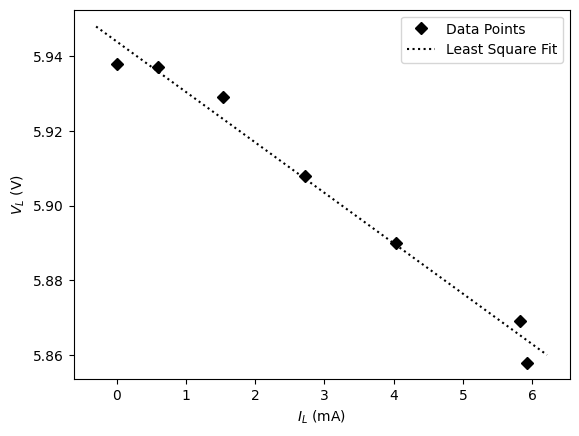

In [92]:
popt2, pcov2 = curve_fit(straight_line, out_i, out_v)
plotting_function_linear(out_i, out_v, popt2, pcov2, '$I_L$ (mA)', '$V_L$ (V)', plot_shape='Dk')

# line regulation

In [109]:
rl1 = 2.179
inp_v1 = np.array([1.577, 4.140, 6.77, 9.17, 11.77, 14.40, 17.24])
out_v1 = np.array([1.257, 3.195, 5.379, 5.875, 5.905, 5.937, 5.970])
out_i1 = np.array([0.58, 1.47, 2.47, 2.70, 2.72, 2.73, 2.75])

v_th1 = (rl1*inp_v1)/(rs+rl1)

v_th1

array([ 1.25530905,  3.29548477,  5.38899321,  7.29941916,  9.36904727,
       11.46255571, 13.72322642])

### V_L vs V_i

C:\Users\user\AppData\Local\Temp\ipykernel_12088\2359131207.py:1: RuntimeWarning: invalid value encountered in log
  def curve(x, m, a, k, c): return m*np.log(a+k*x) + c


(0.79385, 20.0)

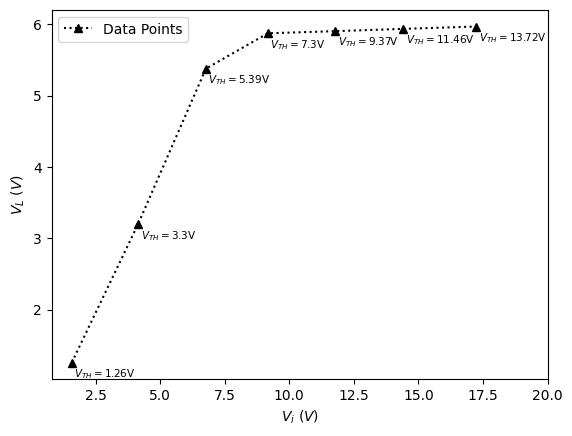

In [140]:
popt1, pcov1 = curve_fit(curve, inp_v1, out_v1)
xs, ys = inp_v1, out_v1
# plotting_function(inp_v1, out_v1, popt1, pcov1, '$V_i$ ($V$)', '$V_L$ ($V$)', plot_shape=':k^')
span = max(xs) - min(xs)
a = 0.05 # amount of free space to be shown before the least point and after the maximum
factor = span*a
# xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

plt.plot(xs, ys, ':k^') 
# plt.plot(xFit, curve(xFit, popt[0], popt[1], popt[2], popt[3]), ':k')
n = 0
for i,j in zip(xs, ys):
    plt.annotate('$V_{TH}=$'+str(round(v_th1[n], 2))+'V', xy=(i+0.1, j-0.2), fontsize=7.5)
    n += 1
    
plt.legend(["Data Points", "", "Error Boundaries"])
plt.ylabel('$V_L$ ($V$)')
plt.xlabel('$V_i$ ($V$)')
plt.gca().set_xlim(right=20)


### V_L vs I_L

If the Equation is $y = mx + c$
For the best fit curve:
    m = 2.175 ± 0.0035
    c = -0.002806 ± 0.00818

The curve looks like:


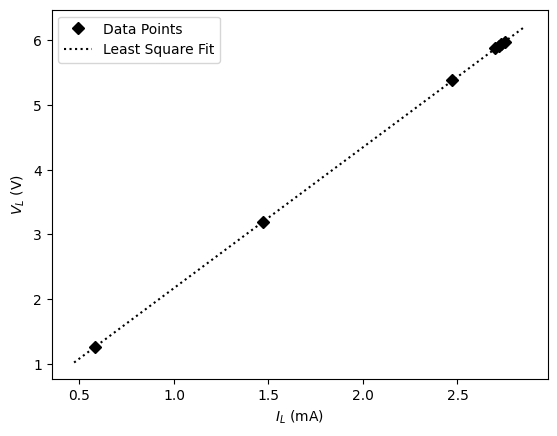

In [123]:
popt3, pcov3 = curve_fit(straight_line, out_i1, out_v1)
plotting_function_linear(out_i1, out_v1, popt3, pcov3, '$I_L$ (mA)', '$V_L$ (V)', plot_shape='Dk')